# Multi Layer Perceptron  - Solving a Regression Problem - IRIS Flower Dataset 

Pose the problem as a Regression problem.

### **Predict sepal_length from the rest of the features.**



## Load IRIS Dataset from Scikitlearn Dataset

In [ ]:
from sklearn import datasets
import numpy as np

In [ ]:
# import some data to play with
iris = datasets.load_iris()

In [ ]:
#print(iris.DESCR)

## Features

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Dataset - Features and Target Labels

In [ ]:
X = iris.data  
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
X.shape

(150, 4)

In [ ]:
X = X[:,[1,2,3]]
y = X[:, 0]

In [ ]:
X.shape

(150, 3)

In [ ]:
y.shape

(150,)

## Split Data into Training and Test Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=101)

In [ ]:
print('\n Shape of Training data : ', X_train.shape)
print('\n Shape of Test data : ', X_test.shape)


 Shape of Training data :  (105, 3)

 Shape of Test data :  (45, 3)


## Standardize Data

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Build the Multi Layer Perceptron Model

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense

In [ ]:
## MODEL 
# Build a simple MLP model
model = Sequential()
model.add(Dense(10, input_dim=3, activation='sigmoid')) # first hidden layer with 5 neurons
model.add(Dense(6, activation='sigmoid')) # second hidden layer with 3 neurons
model.add(Dense(1, activation='linear')) # last layer with 1 output neuron with linear activation 

# Compile MODEL 
model.compile(optimizer='adam', loss='mse', metrics='mse')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                40        
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.utils import plot_model

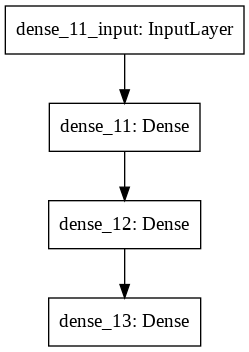

In [ ]:
plot_model(model)

## Initial Weights and Biases

Keras oficial documentation says....

**kernel_initializer="glorot_uniform"**

**bias_initializer="zeros"**

In [ ]:
weights = model.get_weights()

In [ ]:
weights
#weights[0]

[array([[-0.55601364, -0.23986319, -0.51208967, -0.2949679 ,  0.2652101 ,
         -0.35268846,  0.67671263, -0.49256572,  0.05236942, -0.00852174],
        [ 0.5654439 , -0.44375968, -0.07145315, -0.19065014,  0.09676701,
          0.24812692,  0.6512922 ,  0.5941986 , -0.46908554, -0.21195987],
        [ 0.59593856,  0.41412377, -0.02107114, -0.19912088, -0.29270384,
          0.14390928,  0.5297754 , -0.22102115, -0.5911164 , -0.6397271 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.21848446,  0.281623  , -0.37639374, -0.18505725, -0.37379944,
          0.05846375],
        [-0.06779408, -0.4930637 ,  0.35992396,  0.10943633,  0.49368948,
          0.03527659],
        [-0.10757351, -0.16499832, -0.29369104,  0.28008127, -0.46154645,
         -0.17491734],
        [-0.14827743,  0.19330513,  0.20145577, -0.24218175,  0.584101  ,
          0.04388088],
        [ 0.25284445,  0.21322757,  0.5805027 ,  0.13598853,  0.28822243,
  

In [ ]:
#y.dtype

## Train the Model

In [ ]:
history = model.fit(X_train_std, y_train, epochs=100, batch_size=16, validation_data=(X_test_std, y_test))


Epoch 1/100
7/7 [==============================] - 1s 31ms/step - loss: 2.3974 - mse: 2.3974 - val_loss: 2.0793 - val_mse: 2.0793
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 2.2995 - mse: 2.2995 - val_loss: 1.9205 - val_mse: 1.9205
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 2.1058 - mse: 2.1058 - val_loss: 1.7695 - val_mse: 1.7695
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 1.9892 - mse: 1.9892 - val_loss: 1.6270 - val_mse: 1.6270
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 1.7302 - mse: 1.7302 - val_loss: 1.4927 - val_mse: 1.4927
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 1.5679 - mse: 1.5679 - val_loss: 1.3659 - val_mse: 1.3659
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 1.5685 - mse: 1.5685 - val_loss: 1.2468 - val_mse: 1.2468
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 1.3508 - mse: 1.3508 - va

## Post Training - what are the Weights and Biases 

In [ ]:
weights = model.get_weights()

In [ ]:
weights
#weights[0]

[array([[-0.9251015 ,  0.42827475, -0.29294506,  0.3299745 ,  0.8349164 ,
          0.30528215,  1.1099373 ,  0.08741174, -0.35216507,  0.57227135],
        [ 0.46229535, -0.6499122 , -0.24449204, -0.3574518 ,  0.0083227 ,
         -0.01940782,  0.4162209 ,  0.44364113, -0.28918847, -0.25843227],
        [ 0.4603805 ,  0.32929882, -0.18307665, -0.24838936, -0.27623934,
         -0.02191929,  0.3694799 , -0.27312285, -0.45062166, -0.5788526 ]],
       dtype=float32),
 array([-0.04870424,  0.16748203,  0.00053334,  0.14570358,  0.1402259 ,
         0.21387537, -0.14666788,  0.1334125 , -0.12566745,  0.10599671],
       dtype=float32),
 array([[ 0.13702379,  0.35473642, -0.3507138 , -0.1243442 , -0.32713664,
          0.10073529],
        [-0.17473914, -0.30247337,  0.5168091 ,  0.3399551 ,  0.690025  ,
          0.18989387],
        [-0.1954169 , -0.05939573, -0.23287612,  0.3955116 , -0.3801907 ,
         -0.10130616],
        [-0.25293443,  0.37199292,  0.34431747, -0.02561756,  0.7613

## Plot Loss/Accuracy Curve for Training and Validation Data 

In [ ]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

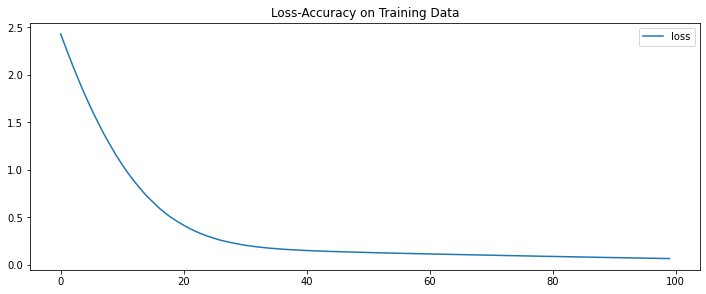

In [ ]:
# Plot Loss Profile of the model on Training Data
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.title('Loss-Accuracy on Training Data')
plt.plot(history.history['loss'], label='loss')
plt.legend()


## Test/Make Predictions

In [ ]:
pred = model.predict(X_test_std)
print(np.round(pred.ravel(),2))
print()
print(y_test)

[3.46 3.42 3.33 2.99 3.13 2.86 2.67 2.73 2.76 3.19 2.98 3.45 3.32 2.85
 3.   3.01 3.06 3.01 3.27 2.82 2.79 3.39 2.86 3.09 3.01 3.02 2.77 2.86
 3.19 2.89 2.95 2.82 2.99 2.93 2.97 2.95 3.08 3.04 2.91 2.94 3.39 3.37
 3.26 3.01 3.03]

[4.2 3.9 3.5 3.  3.2 2.7 2.2 2.3 2.5 3.  3.  4.1 3.4 2.8 3.  2.9 3.  2.9
 3.2 2.6 2.4 3.7 2.6 3.1 2.9 2.9 2.3 2.8 3.  2.3 3.  2.5 3.  2.7 3.  2.8
 3.1 3.  2.7 3.  3.7 3.6 3.2 3.  3. ]


## Regression Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

### Accuracy

In [ ]:
mse = mean_squared_error(y_test, pred) 
print(" MSE = ", mse)

 MSE =  0.07106924233463198


In [ ]:
r2 = r2_score(y_test, pred) 
print(" R2 = ", r2)

 R2 =  0.6473184930460478


## Evaluate the Model on the Test Set

In [ ]:
results = model.evaluate(X_test_std, y_test)

print('Final test set Loss: {:4f}'.format(results[0]))
print('Final test set MSE: {:4f}'.format(results[1]))

2/2 [==============================] - 0s 3ms/step - loss: 0.0711 - mse: 0.0711
Final test set Loss: 0.071069
Final test set MSE: 0.071069


## Verify the Output with an individual Sample

In [ ]:
idx = 10 # Index of a data sample present in the Test set

indvidual_test_sample = X_test_std[idx,:].reshape(1, 3)

print('\n Input sample Original : ' , X_test[idx,:].reshape(1, 3) )
print('\n Input sample Standardize : ' , indvidual_test_sample )

pred = model.predict(indvidual_test_sample)

print('\n Predicted value by the model : ', pred)

print('\n True/Actual Value : ', y_test[idx])


 Input sample Original :  [[3.  5.2 2. ]]

 Input sample Standardize :  [[-0.19938725  0.7952115   0.99844277]]

 Predicted value by the model :  [[2.9808044]]

 True/Actual Value :  3.0
